# Exercise 06 - CNNs for Handwritten Digits Recognition ("MNIST")

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# Group A
In this exercise, you are asked to implement the so called LeNet-5 architecture, the first groundbreaking CNN architecture invented by Yan LeCun et al. [1], published in 1998. Implement the architecture in the method "LeNet" defined below. The function expects an input tensor and should output two things: The logits, and the softmax-activation of the logits. The entire code for training a CNN with tensorflow is provided, you simply have to plug in the "LeNet"-function at the right place in the code below, which is already done for you.

Train a model using the provided training script and be prepared to interpret the training progress and results. A working set of default hyperparameters is already provided. 

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

# LeNet Architecture
![LeNet Architecture](data/lenet.png)
Source: Yan LeCun

In [23]:
def LeNet(tensor):
    # TODO

    return logits, tf.nn.softmax(logits)

# Group B
In this exercise, you are asked to implement a modified version of the so called AlexNet architecture, proposed by Alex Krizhevsky et al. in [2] for ImageNet. By default, it was intended to operate on 224x224x3px sized images from the ImageNet challenge. Implement the architecture in the method "AlexNet" defined below such that it can accept 28x28px sized input and output a 10-element vector with class probabilities (you have some creative freedom here). Therefore, leave out the first block consisting of convolution, local response normalization and max-pooling (refer to the paper or online resources for more details on the architecture). For the fully connected layers, use two consecutive layers with 120 and 84 neurons each instead of 4096 (as seen in LeNet in Exercise for Group A). The function expects an input tensor and should output two things: The logits, and the softmax-activation of the logits. The entire code for training a CNN with tensorflow is provided, you simply have to plug in the "AlexNet"-function at the right place in the code below (substitute the call of the LeNet-function with AlexNet).

Be prepared to answer the following questions: 
* How does FC8 have to be modified such that it works for MNIST?
* How does Layer Response Normalization work?
* If you don't have a GPU: does it train on your CPU? How many parameters does it have compared to LeNet (estimate)?

[2] Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." Advances in neural information processing systems. 2012.

![AlexNet architecture](data/alexnet.png)
Source: https://www.saagie.com/blog/object-detection-part1

In [4]:
def AlexNet(tensor):    
    #TODO
    
    return logits, tf.nn.softmax(logits)

# Group C
In this exercise, you are asked to implement a modified version of the so called VGG-16 network architecture, originally proposed by Simonyan et al. [3] in 2014 for classifying 224x224x3 sized images into 1000 classes on behalf of the ImageNet challenge. The architecture by default is too deep for MNIST. Be creative and implement a shallower variant of the architecture in the method "VGGNet" defined below such that it can accept 28x28px sized input and outputs a 10-element vector with class probabilities (Hint: you can for instance leave out columns 5-10 in the table describing the architecture, and use half the number of filters). Make sure you do not change the convolution kernel size of 3x3 which is very characteristic for VGG. For the fully connected layers, use two consecutive layers with 120 and 84 neurons each instead of 4096 (as seen in LeNet in Exercise for Group A). The function expects an input tensor and should output two things: The logits, and the softmax-activation of the logits. The entire code for training a CNN with tensorflow is provided, you simply have to plug in the "VGGNet"-function at the right place in the code below (substitute the call of the LeNet-function with VGGNet).

Be prepared to answer the following questions (It is recommended to refer to the paper for more details):
- What is it that makes the VGG-Net architecture so special?
- Does it make sense to make VGG-Net so shallow for MNIST?

[3] Simonyan, Karen, and Andrew Zisserman. "Very deep convolutional networks for large-scale image recognition." arXiv preprint arXiv:1409.1556 (2014).

![VGG16 architecture](data/vgg16.png)
Source: http://mmlab.ie.cuhk.edu.hk/projects/PCN.html

In [3]:
def VGGNet(tensor):
    #TODO
    # block 1
    # 64*3*3*2
    conv1 = tf.layers.conv2d( inputs=tensor, filters=64, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu) 
    conv2 = tf.layers.conv2d( inputs=conv1, filters=64, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu)
    # block 2 
    max_pool3 = tf.layers.max_pooling2d( inputs = conv2, pool_size = (2,2),strides = (2,2),  padding = "same")
    
    # block 3
    # 128*3*3*2
    conv4 = tf.layers.conv2d( inputs=max_pool3, filters=128, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu)
    conv5 = tf.layers.conv2d( inputs=conv4, filters=128, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu)
    
    #block 4
    max_pool6 = tf.layers.max_pooling2d( inputs = conv5, pool_size = (2,2),strides = (2,2),  padding = "same")
    
    #block 5
    # 256*3*3
    conv7 = tf.layers.conv2d( inputs=max_pool6, filters=256, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu)
    #block 6
    max_pool8 = tf.layers.max_pooling2d( inputs = conv7, pool_size = (2,2),strides = (2,2),  padding = "same")
    
    #block7
    # 512*3*3
    conv9 = tf.layers.conv2d( inputs=max_pool8, filters=512, kernel_size=[3, 3], padding="same", 
                             activation=tf.nn.relu)
    max_pool10 = tf.layers.max_pooling2d( inputs = conv9, pool_size = (2,2),strides = (2,2),  padding = "same")
    #block 8 
    flat = tf.contrib.layers.flatten(max_pool10)
    fc10 = tf.layers.dense(inputs = flat, units= 50 , activation= tf.nn.relu)
    
    #block 9
    logits = tf.layers.dense(inputs = fc10,units= 10 , activation= None)
    
    return logits, tf.nn.softmax(logits)

# Group D
In this exercise, you are asked to implement a ResNet-like architecture, as proposed by He et al. [4] in 2016, originally proposed for the ImageNet challenge. Implement the architecture described below in the method "ResNet" such that it can accept 28x28px sized input and output a 10-element vector with class probabilities. Use only 2 consecutive residual blocks before ending in the fully connected layers. For the fully connected layers, use two consecutive layers with 120 and 84 neurons each (as seen in LeNet in Exercise for Group A). The function expects an input tensor and should output two things: The logits, and the sigmoid-activation of the logits. The entire code for training a CNN with tensorflow is provided, you simply have to plug in the "ResNet"-function at the right place in the code below (substitute the LeNet-function with the ResNet-function).

Be prepared to explain the concept of residual blocks!

Architecture: 
* Residual Block of Depth 1 with 32 Filters, 3x3 Kernels and ReLu activations
* MaxPooling with Kernelsize 2x2 and stride 2
* Residual Block of Depth 1 with 64 Filters, 3x3 Kernels and ReLu activations
* MaxPooling with Kernelsize 2x2 and stride 2
* Fully connected layer with 120 Neurons
* ReLu Activation
* Fully connected layer with 84 Neurons
* ReLu Activation
* Output Fully connected layer

Below is a depiction of a residual block:
![VGG16 architecture](data/residualblock.png)

[4] He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

In [6]:
def ResNet(tensor):
    #TODO
    
    return logits, tf.nn.softmax(logits)

# CNN Training code starts here ;)

In [4]:
def visualizeCurves(curves, handle=None):
    if not handle:
        handle = plt.figure()

    fig = plt.figure(handle.number)
    fig.clear()
    ax = plt.axes()
    plt.cla()

    counter = len(curves[list(curves.keys())[0]])
    x = np.linspace(0, counter, num=counter)
    for key, value in curves.items():
        value_ = np.array(value).astype(np.double)
        mask = np.isfinite(value_)
        ax.plot(x[mask], value_[mask], label=key)
    plt.legend(loc='upper right')
    plt.title("Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    display.clear_output(wait=True)
    plt.show()
    
def printNumberOfTrainableParams():
    total_parameters = 0
    variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
    for variable in variables:
        # shape is an array of tf.Dimension
        shape = variable.get_shape()
        print(shape)
        # print(len(shape))
        variable_parametes = 1
        for dim in shape:
            #    print(dim)
            variable_parametes *= dim.value
        # print(variable_parametes)
        total_parameters += variable_parametes
    print(total_parameters)

In [5]:
# Config
config = {}
config['batchsize'] = 128
config['learningrate'] = 0.01
config['numEpochs'] = 10

In [6]:
# Download and read in MNIST automatically
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("Image Shape: {}".format(mnist.train.images[0].shape))
print()
print("Training Set:   {} samples".format(len(mnist.train.images)))
print("Validation Set: {} samples".format(len(mnist.validation.images)))
print("Test Set:       {} samples".format(len(mnist.test.images)))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
()
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


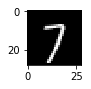

In [7]:
# Visualize a sample from MNIST
index = random.randint(0, len(mnist.train.images))
image = mnist.train.images[index].reshape((28, 28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")


In [8]:
# Clear Graph
tf.reset_default_graph()

# Define placeholders
inputs = {}
inputs['data'] = tf.placeholder(tf.float32, [None, 32, 32, 1])
inputs['labels'] = tf.placeholder(tf.float32, [None, 10])
inputs['phase'] = tf.placeholder(tf.bool)

# Define a dictionary for storing curves
curves = {}
curves['training'] = []
curves['validation'] = []

# Instantiate the model operations
logits, probabilities = VGGNet(inputs['data']) # Or VGGNet or ResNet or AlexNet
printNumberOfTrainableParams()

# Define loss function in a numerically stable way
# DONT: cross_entropy = tf.reduce_mean(-tf.reduce_sum( * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = inputs['labels']))

# Operations for assessing the accuracy of the classifier
correct_prediction = tf.equal(tf.argmax(probabilities,1), tf.argmax(inputs['labels'],1))
accuracy_operation = tf.cast(correct_prediction, tf.float32)

# Idea: Use different optimizers?
# SGD vs ADAM
#train_step = tf.train.AdamOptimizer(config['learningrate']).minimize(cross_entropy)
train_step = tf.train.GradientDescentOptimizer(config['learningrate']).minimize(cross_entropy)

(3, 3, 1, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 512)
(512,)
(2048, 50)
(50,)
(50, 10)
(10,)
1837296


In [9]:
# Create TensorFlow Session and initialize all weights
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

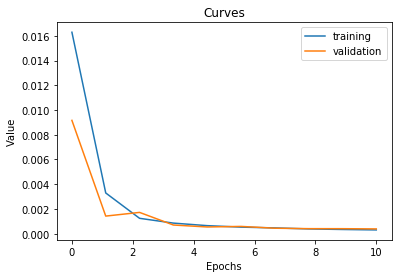

In [10]:
# Run!
numTrainSamples = len(mnist.train.images)
numValSamples = len(mnist.validation.images)
numTestSamples = len(mnist.test.images)
for e in range(config['numEpochs']):
    avg_loss_in_current_epoch = 0
    for i in range(0, numTrainSamples, config['batchsize']):
        batch_data, batch_labels = mnist.train.next_batch(config['batchsize'])
        batch_data = batch_data.reshape((batch_data.shape[0], 28, 28, 1))
        
        batch_data = np.pad(batch_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
        fetches = {
            'optimizer': train_step,
            'loss': cross_entropy
        }
        results = sess.run(fetches, feed_dict={inputs['data']: batch_data, inputs['labels']: batch_labels})
        if((i/128)% 20 == 0):
            print("Training  |  epoch : %d  | Iter : %d   | loss : %0.4f " %(e, i/128,results['loss']))
        avg_loss_in_current_epoch += results['loss']
    avg_loss_in_current_epoch = avg_loss_in_current_epoch / i
    curves['training'] += [avg_loss_in_current_epoch]
        
    for i in range(0, numValSamples, config['batchsize']):
        # Use Matplotlib to visualize the loss on the training and validation set
        batch_data, batch_labels = mnist.validation.next_batch(config['batchsize'])
        batch_data = batch_data.reshape((batch_data.shape[0], 28, 28, 1))
        
        # TODO: Preprocess the images in the batch
        batch_data = np.pad(batch_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
        
        fetches = {
            'loss': cross_entropy
        }
        results = sess.run(fetches, feed_dict={inputs['data']: batch_data, inputs['labels']: batch_labels})
        print("Validation  |  epoch : %d  | Iter : %d   | loss : %0.4f " %(e, i/128,results['loss']))

        avg_loss_in_current_epoch += results['loss']
    avg_loss_in_current_epoch = avg_loss_in_current_epoch / i
    curves['validation'] += [avg_loss_in_current_epoch]
    
    print('Done with epoch %d' % (e))
    visualizeCurves(curves)

In [11]:
# Test
accumulated_predictions = np.array([])
for i in range(0, numValSamples, config['batchsize']):
    # Use Matplotlib to visualize the loss on the training and validation set
    batch_data, batch_labels = mnist.test.next_batch(config['batchsize'])
    batch_data = batch_data.reshape((batch_data.shape[0], 28, 28, 1))
        
    # TODO: Preprocess the images in the batch
    batch_data = np.pad(batch_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    fetches = {
        'accuracy': accuracy_operation
    }
    results = sess.run(fetches, feed_dict={inputs['data']: batch_data, inputs['labels']: batch_labels})
    
    if i==0:
        accumulated_predictions = results['accuracy']
    else:
        accumulated_predictions = np.append(accumulated_predictions, results['accuracy'])
accuracy = np.mean(accumulated_predictions)
print(accuracy)

0.985547
